In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import math
%matplotlib inline


In [3]:
def plot_images(images, grey):
    fig = plt.figure(figsize=(15,18))
    for i in range(min(16, len(images))):
        fig.add_subplot(4, 4, i+1)
        if grey:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i]) 
    plt.show() 

In [4]:
def drop_index(index):
    index_x = []
    index_result = []
    for i in range(1, len(index)):
        if (index[i] - index[i-1]) == 1:
            index_x.append(index[i-1])
        else:            
            index_x.append(index[i-1])
            index_m = int(np.mean(index_x))
            index_result.append(index_m)
            index_x = []
    return index_result
        

In [5]:
def char_crop(img, mean_size=3, median_k_a=1.1, mdedian_k_b=1.2, pix_shift_back=2, pix_shoft_forw=4, char_size_min=5.5):
    mean_imgs = []
    imgs = []
    for i in range(0, img.shape[1]):
        mean_imgs.append(np.mean(img[:, i:i + mean_size]))
        i += mean_size
    med_all_img = np.median(mean_imgs)*median_k_a
    print(med_all_img)
    index = np.where(mean_imgs >= med_all_img)
    mean_imgs = np.array(mean_imgs)
    mean_imgs[index] = np.max(mean_imgs)
    index = np.where(mean_imgs >= np.max(mean_imgs))
    plt.plot([0, img.shape[1]], [med_all_img, med_all_img])
    plt.plot(mean_imgs)
    if len(index) > 0:
        index = index[0]
    if index[0] > (2*mean_size):
        index = np.insert(index, 0, mean_size)
    for i in range(1, len(index)):
        if (index[i] - index[i-1]) < char_size_min:
            continue
        li = index[i-1]-pix_shift_back if index[i-1]-pix_shift_back >= 0 else index[i-1]
        ri = index[i]+pix_shoft_forw if index[i]+pix_shoft_forw <= img.shape[1] else img.shape[1]
        print(index[i-1], li, index[i], ri)
        imgs.append(np.copy(img[0:img.shape[0], li:ri]))
    plot_images(imgs, True)
    return imgs

In [6]:
def lp_crop(img, mean_size=2, median_k_=0.8, char_size_min=5, max_crop= 5):
    mean_imgs = []
    for i in range(0, img.shape[0]):
        mean_imgs.append(np.mean(img[i:i + mean_size, :]))
        i += mean_size
    med_all_img = np.mean(mean_imgs)*0.8
    print(med_all_img)
    index = np.where(mean_imgs <  med_all_img)
    hh = img.shape[0]*0.5
    index = np.squeeze(index, -1)
    sl =index[index >= hh]
    if len(sl) > 0:
        l_top = np.min(sl)
        l_top = l_top if img.shape[0] - l_top <= max_crop else img.shape[0] - max_crop
        print(l_top, img.shape[0])
        img[l_top: img.shape[0], :] = 255
    sl =index[index <= hh]
    if len(sl) > 0:
        l_bot = np.max(sl)
        l_bot = l_bot if l_bot <= max_crop else max_crop
        print(l_bot)
        img[0:l_bot, :] = 255  
    return img
    
    

In [7]:
def img_crop(img, mean_size=2, median_k_=0.8, level_blank = 2, char_bot_off=3, char_top_off=3, invert=False):
    mean_imgs = []
    for i in range(0, img.shape[0]):
        mean_imgs.append(np.mean(img[i:i + mean_size, :]))
        i += mean_size
    index = np.where(mean_imgs >= np.int32(level_blank)) if invert else np.where(mean_imgs <= np.int32(level_blank))
    print(index)
    hh = img.shape[0]*0.5
    index = np.squeeze(index, -1)
    sl =index[index >= hh]
    l_top = np.min(sl) - 1 if len(sl) > 0 else img.shape[0] - 1
    sl =index[index <= hh]
    l_bot = np.max(sl) + 1 if len(sl) > 0 else 1 
    w = img.shape[1]
    h = l_top - l_bot
    print(h, w)
    imc = np.zeros((h, w))
    print(imc.shape)
    print(img.shape)
    imc[:,:] = img[l_bot:l_top, :]
    plt.plot(mean_imgs)
    return np.uint8(imc)

(64, 128)
128.384033203125
61 64
5
200.14843750000003
6 4 16 20
21 19 32 36
34 32 45 49
47 45 59 63
64 62 71 75
96 94 106 110
108 106 119 123


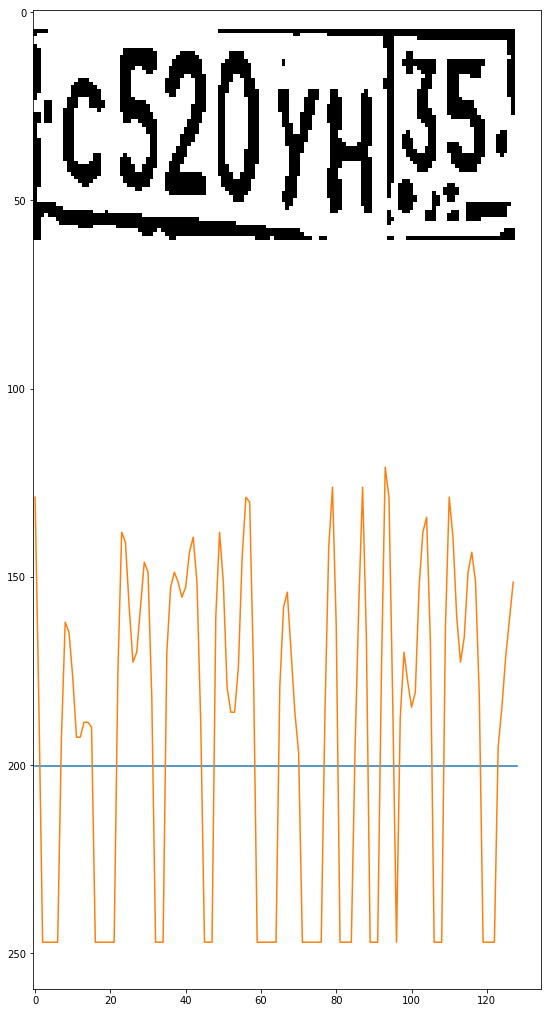

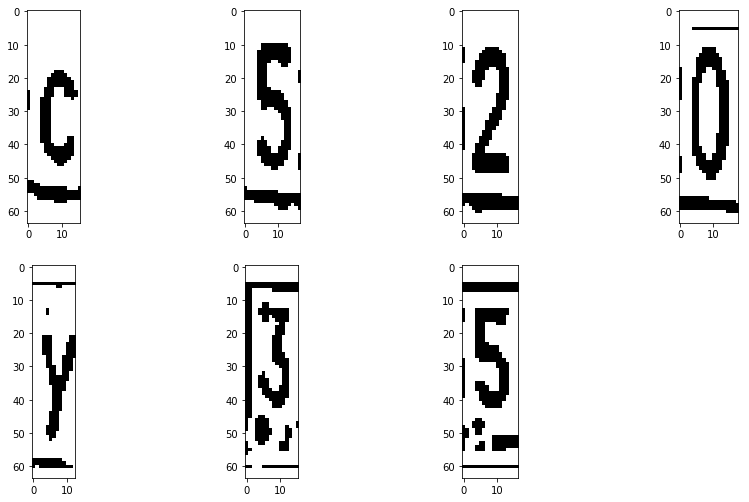

In [18]:
img=cv2.imread('/mnt/misk/misk/lplate/data/data_rt/1/14_655_C520YH35.bmp', cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img, (128, 64))
print(img.shape)
MEAN_SIZE = 2
fig = plt.figure(figsize=(15,18))
#img = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 3)
kernel = np.ones((1,1),np.uint8)
img = cv2.erode(img, kernel, iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 1))
ret, img = cv2.threshold(img, 100, 255, 0)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#plt.plot([0, img.shape[0]], [med_all_img, med_all_img])
#plt.plot(mean_imgs)
img = lp_crop(img)
imgplot = plt.imshow(img, cmap='gray')
imgs = char_crop(img)

In [19]:
img_wb = []
plt.figure(figsize=(15,18))
for i in range(0, len(imgs)):    
    if imgs[i].shape[1] > 19:
        img_wb.append(i)
off_corr = 0
for i in img_wb:
    plt.imshow(imgs[i + off_corr])
    imgs_split = char_crop(imgs[i+off_corr], pix_shift_back=3, pix_shoft_forw=3)
    if len(imgs_split) > 0:
        imgs[i + off_corr] = imgs_split[0]
        inx = i + 1 + off_corr
        for y in range(1, len(imgs_split)):
            imgs.insert(inx, imgs_split[y])
            inx +=1
    off_corr += len(imgs_split) - 1 

<Figure size 1080x1296 with 0 Axes>

(array([ 2, 35, 36, 48, 59, 60, 61, 62, 63]),)


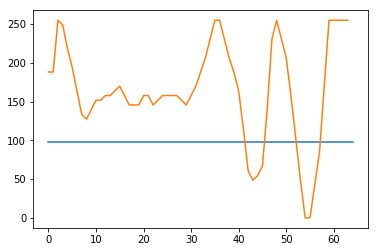

In [645]:
img_crop(imgs[9], mean_size=2, level_blank = 250)

(array([59, 60, 61, 62, 63]),)


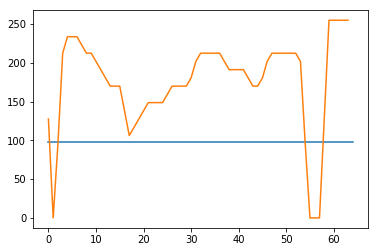

In [636]:
img_crop(imgs[6], mean_size=2, level_blank = 250)

(array([], dtype=int64),)
62 16
(62, 16)
(64, 16)
(array([55]),)
53 17
(53, 17)
(64, 17)
(array([56]),)
54 17
(54, 17)
(64, 17)
(array([58]),)
56 18
(56, 18)
(64, 18)
(array([], dtype=int64),)
62 13
(62, 13)
(64, 13)
(array([5]),)
57 16
(57, 16)
(64, 16)
(array([5, 6]),)
56 17
(56, 17)
(64, 17)


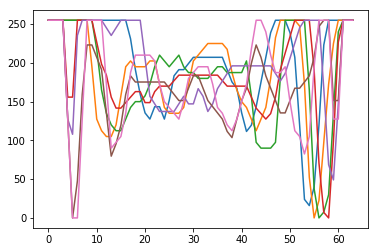

In [20]:
for i in range(0, len(imgs)):
    imgs[i] = img_crop(imgs[i])

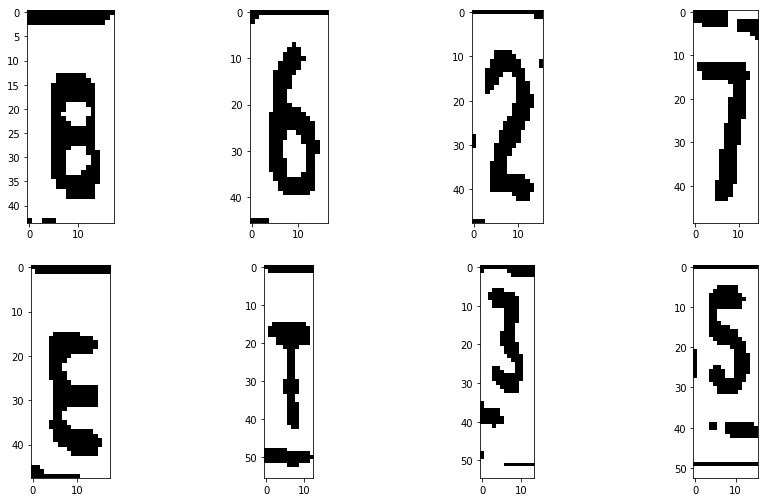

In [16]:
plot_images(imgs, True)

In [1]:
imgs_n = []
i = 1
for img in imgs:
    im2, contours, hierarchy = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for cnt in contours:
        cnt = np.reshape(cnt, (cnt.shape[0], 2))
        min_x, min_y = np.min(cnt, axis=0)
        max_x, max_y = np.max(cnt, axis=0)
        if (max_x - min_x) > 0:            
            koeff = math.fabs((max_y - min_y) / (max_x - min_x))
            print(koeff, cv2.contourArea(cnt))
            if 0.6 < koeff < 6.1 and 80 < cv2.contourArea(cnt):
                print(i, 'Append', cv2.contourArea(cnt))
                i += 1
                cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (0, 0, 255), 1)
                imgs_n.append(cv2.resize(img, (img.shape[1] * 10, img.shape[0] * 10)))
                break
plot_images(imgs_n, False)

NameError: name 'imgs' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 46,
       47, 48, 57, 58, 59, 60, 61]),)
29 16
(29, 16)
(62, 16)
1.8125
(array([ 0,  1,  2,  3,  4,  5,  6,  7, 47, 48, 49, 50]),)
38 17
(38, 17)
(53, 17)
2.235294117647059
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 48, 49, 50, 51, 52, 53]),)
38 17
(38, 17)
(54, 17)
2.235294117647059
(array([ 0,  1,  2,  5,  6,  7,  8, 50, 51, 52, 53]),)
40 18
(40, 18)
(56, 18)
2.2222222222222223
(array([ 0,  1,  2,  6,  7,  8,  9, 10, 14, 15, 16, 17, 18, 52, 53, 54, 55,
       60, 61]),)
32 13
(32, 13)
(62, 13)
2.4615384615384617
(array([51, 52, 55, 56]),)
49 16
(49, 16)
(57, 16)
3.0625
(array([ 1,  2,  3,  4, 36, 37, 49, 50, 51, 54, 55]),)
30 17
(30, 17)
(56, 17)
1.7647058823529411


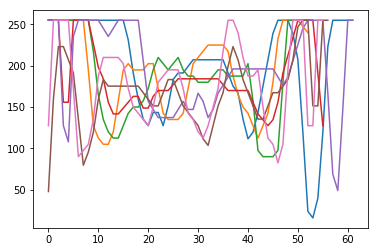

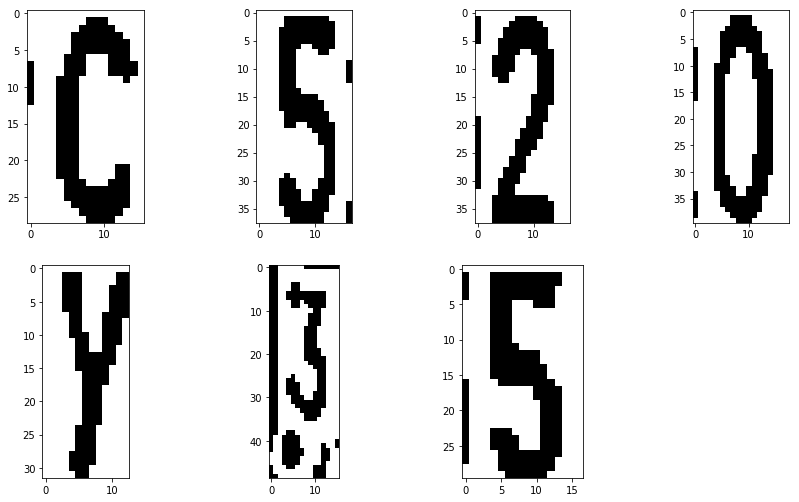

In [21]:
for i in range(0, len(imgs)):
    imgs[i] = img_crop(imgs[i], level_blank=251, invert=True)
    print(imgs[i].shape[0]/imgs[i].shape[1])
plot_images(imgs, True)